# Testo Esercizio

Esercizio n. 1 (Meo) in Laboratorio sugli alberi di decisione con sci kit learn:

a) applicate un sovracampionamento (artificial inflation) ad una classe nel training set con un determinato fattore: 10 (si pesi di più una delle classi tra virginica o versicolor che sono più difficili da discriminare). Si apprenda l'albero di decisione in queste condizioni. Attenzione che in questo caso la suddivisione tra training set e test set non deve rilasciare nel test set nessuna delle copie che abbiamo aggiunto, altrimenti si favorirebbe troppo il classificatore dando copie presenti nel training set anche nel test set. Quindi se volete usare la crossvalidation, dovete farla voi, da programma Python "a mano" (e non usare quella fornita da scikit learn, che non fa questo controllo).

b) modificare i pesi della stessa classe (si metta a 10 il peso per l'errata predizione ad esempio di Virginica in Versicolor o viceversa) e si apprenda l'albero in queste condizioni. Dovreste ottenere risultati simili a quelli del punto 1.
Si apprendano gli alberi cercando di evitare l'overfitting (migliorando l'errore sul test set) facendo 'tuning' degli iper-parametri: il minimo numero dei campioni per foglia, la massima profondità dell'albero, i parametri di minomo decremento dell'impurezza, massimo numero dei nodi foglia, ecc. Si consiglia di usare la classe gridSearchCV per questo tipo di tuning di molti parametri.


c) si costruisca la matrice di confusione dell'albero creato sul test set e la si visualizzi. 
si costruiscano le curve ROC (o curve nello spazio di coverage) e le si mostri per ciascun modello ad albero creato su un problema binario (con 1 sola classe positiva): per ciascun modello dovete costruire tre curve, una per ciascuna classe, considerata a turno la classe positiva.

# Import all libraries

In [137]:
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np


## Define utility functions

In [204]:
def print_decision_tree(model,x_size, y_size, feature_names= None,  class_names=None):
    """
    Simply visualize a decision tree
    :param model: 
    :param x_size: 
    :param y_size: 
    :param feature_names: 
    :param class_names: 
    :return: 
    """
    fig = plt.figure(figsize=(x_size,y_size))
    tree.plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    

def splitting_training_testing_set(dataset):
    """
    Generate a random permutation of the indices of examples that will be later used for the training and the test set
    :param dataset: 
    :return: X_train, y_train, X_test, y_test
    """
    np.random.seed(0)
    indices = np.random.permutation(len(dataset.data))
    
    # We now decide to keep the last 10 indices for test set, the remaining for the training set
    indices_training=indices[:-10]
    indices_test=indices[-10:]
    
    X_train = dataset.data[indices_training] 
    y_train = dataset.target[indices_training]
    X_test  = dataset.data[indices_test] 
    y_test  = dataset.target[indices_test]
    
    return X_train, y_train, X_test, y_test, indices_training, indices_test


def artificial_inflaction(ratio, label, X_train, y_train):
    """
    Perform an artificial inflation on a given dataset by a given ratio
    :param ratio: 
    :return: 
    """
    new_X_train = []
    new_y_train = []
    for i,el in enumerate(X_train):
        if y_train[i] == label:
            for j in range(0, ratio):
                new_X_train.append(el)
                new_y_train.append(y_train[i])    
        else:
            new_X_train.append(el)
            new_y_train.append(y_train[i])
    
    return new_X_train, new_y_train


def evaluate_model(y_test, predicted):
    """
    Evaluate the model on the test set
    :param y_test: 
    :param predicted: 
    :return: accuracy, precision, recall, f1
    """
    accuracy = accuracy_score(y_test, predicted)
    precision = precision_score(y_test, predicted, average='macro')
    recall = recall_score(y_test, predicted, average='macro')
    f1 = f1_score(y_test, predicted, average='macro')
    
    return accuracy, precision, recall, f1


def print_confusion_matrix(y_test, predicted, target_names):
    """
    Print the confusion matrix
    :param y_test: 
    :param predicted: 
    :return: 
    """
    
    matrix = confusion_matrix(y_test, predicted)
    plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens, class_names=target_names)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


def display_ROC_curve(y_test, y_pred, target_names):
    """
    Display ROC curve
    :param y_test: 
    :param y_pred: 
    :param target_names: 
    :return: 
    """
    figure, axis = plt.subplots(1, 3, figsize=(15, 5)) 
    colors = ['tab:orange', 'tab:green', 'tab:purple']
    for i,label in enumerate(target_names):
        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=i)
        roc_auc = metrics.auc(fpr, tpr)
        
        axis[i].plot(fpr,tpr, colors[i], label="Roc AUC: " + str(round(roc_auc,3))) 
        axis[i].legend(loc="upper right")
        axis[i].set_title("ROC curve assuming positive class: " + label) 
        #display.plot()
    
    for ax in axis.flat: ax.set(xlabel='False Positive rate', ylabel='True Positive rate')
    plt.show()
    
    
    


## Main

In [96]:
iris = load_iris()
X_train, y_train, X_test, y_test, indices_training, indices_test = splitting_training_testing_set(iris)
#X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.9, random_state=1234)

ratio = 10
new_X_train, new_y_train = artificial_inflaction(ratio, 1, X_train, y_train)

print("Lenght train: ", len(X_train))
print("Lenght test: ", len(X_test))
print("Target names: ", iris.target_names)
print(y_test)


Lenght train:  140
Lenght test:  10
Target names:  ['setosa' 'versicolor' 'virginica']
[1 1 1 0 0 0 2 1 2 0]


## Performing a GridSearch for tuning the iperparameters of the model

In [117]:
print("Tuning without artificial inflaction...")
parameters = {'criterion':('entropy', 'gini', "log_loss"), 
              'splitter': ('best', 'random'),
              'max_depth': (4, 5, 10), 
              'min_samples_split': (2,10,25),
              'min_samples_leaf': (1,10,25),
              'min_impurity_decrease': (0.0, 0.1, 1)
              }
model = tree.DecisionTreeClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)
print("Best Parameters: ")
print(clf.best_params_)

print("\n\nTuning with artificial inflaction...")
model = tree.DecisionTreeClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(new_X_train, new_y_train)
print("Best Parameters: ")
print(clf.best_params_)


Tuning without artificial inflaction...
Best Parameters: 
{'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


Tuning with artificial inflaction...
Best Parameters: 
{'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 25, 'splitter': 'random'}


## Training the model before the artificial inflaction

Accuracy:  0.9
Precision:  0.8888888888888888
Recall:  0.9166666666666666
F1 score:  0.8857142857142858


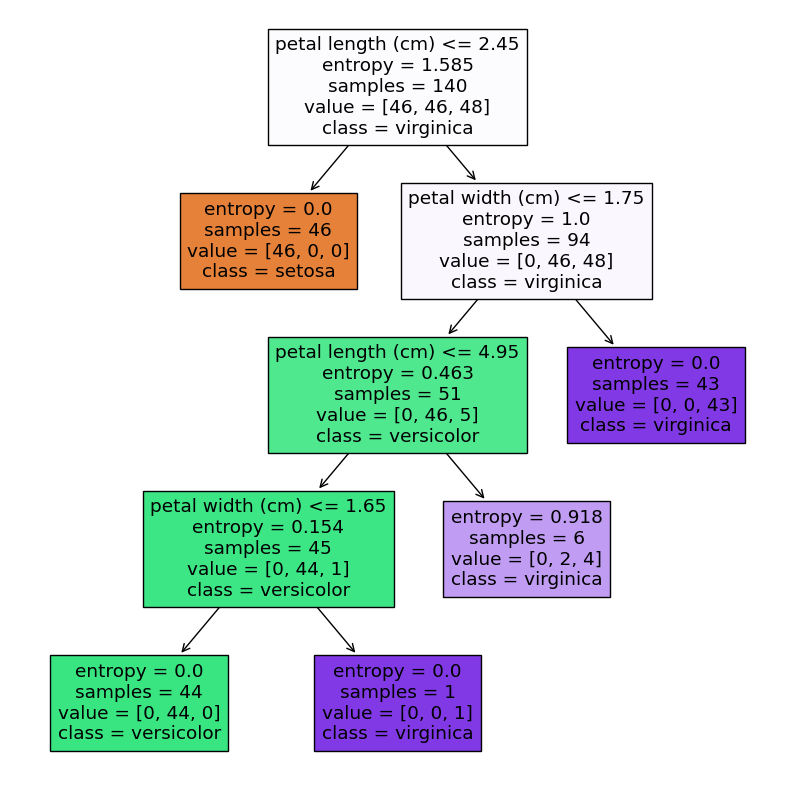

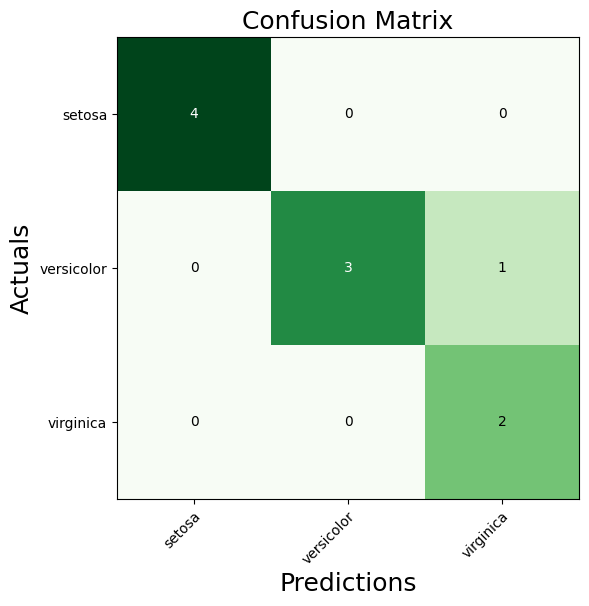

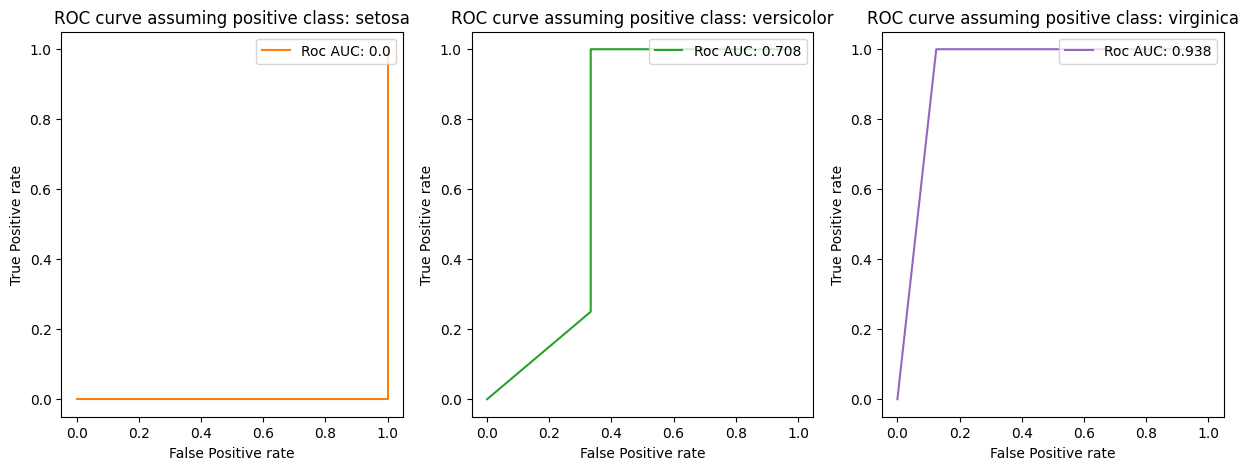

In [206]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  max_depth=5, 
                                  splitter="best",
                                  min_impurity_decrease =0.0,
                                  min_samples_split=10, 
                                  min_samples_leaf=1,
                                  random_state=300,
                                  class_weight={0:1,1:1,2:1})

clf = clf.fit(X_train, y_train)
predicted_y_test = clf.predict(X_test)

accuracy, precision, recall, f1 = evaluate_model(y_test, predicted_y_test)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

print_decision_tree(clf, 10,10, feature_names=iris.feature_names,class_names=iris.target_names)
print_confusion_matrix(y_test,predicted_y_test, iris.target_names)
display_ROC_curve(y_test, predicted_y_test, iris.target_names)

## a) Training the model after the artificial inflaction

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


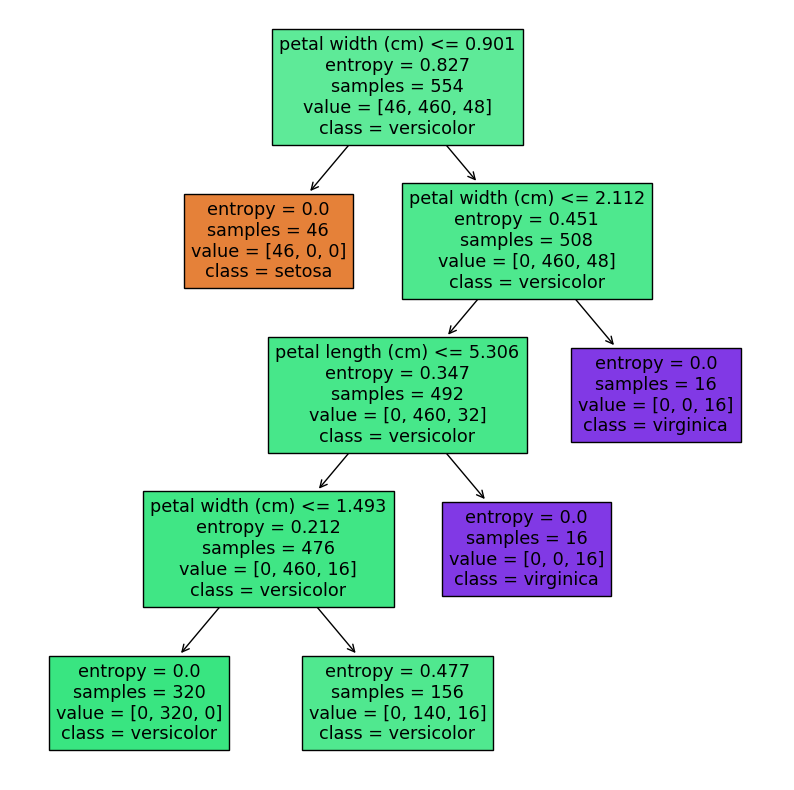

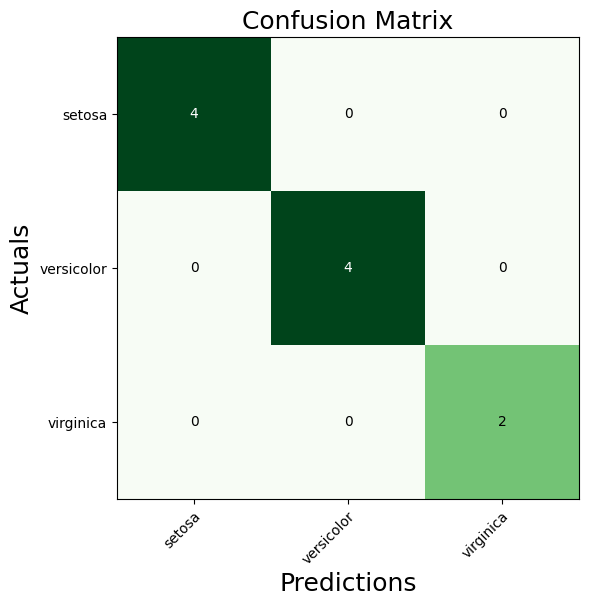

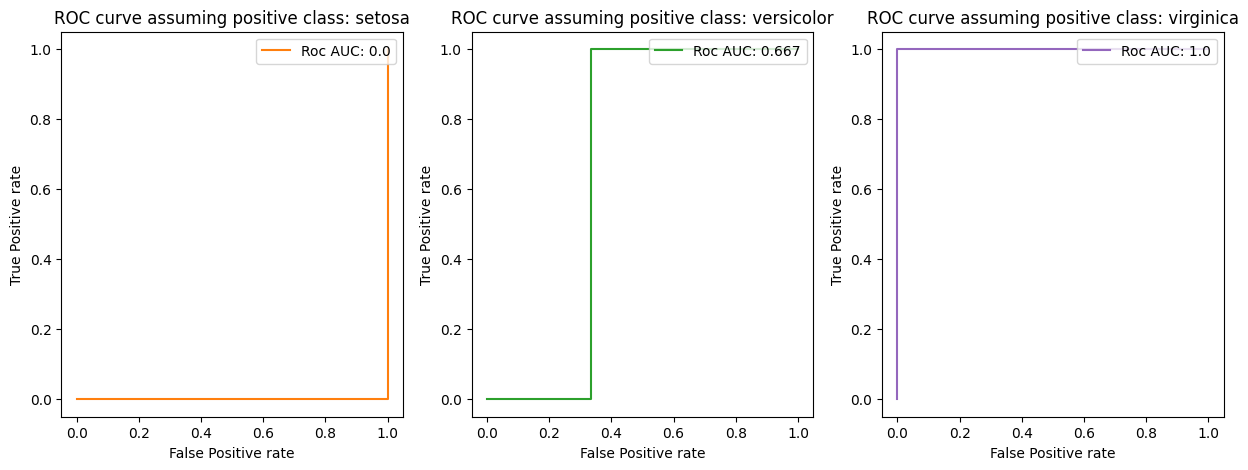

In [207]:
ratio = 10
new_X_train, new_y_train = artificial_inflaction(ratio, 1, X_train, y_train)
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  max_depth=4, 
                                  splitter="random",
                                  min_impurity_decrease = 0.0,
                                  min_samples_split=25, 
                                  min_samples_leaf=1,
                                  random_state=300,
                                  class_weight={0:1,1:1,2:1})
clf = clf.fit(new_X_train, new_y_train)
predicted_y_test = clf.predict(X_test)

accuracy, precision, recall, f1 = evaluate_model(y_test, predicted_y_test)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

print_decision_tree(clf, 10,10, feature_names=iris.feature_names,class_names=iris.target_names)
print_confusion_matrix(y_test,predicted_y_test, iris.target_names)
display_ROC_curve(y_test, predicted_y_test, iris.target_names)

## b) Training the model after the artificial inflaction with different weights

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


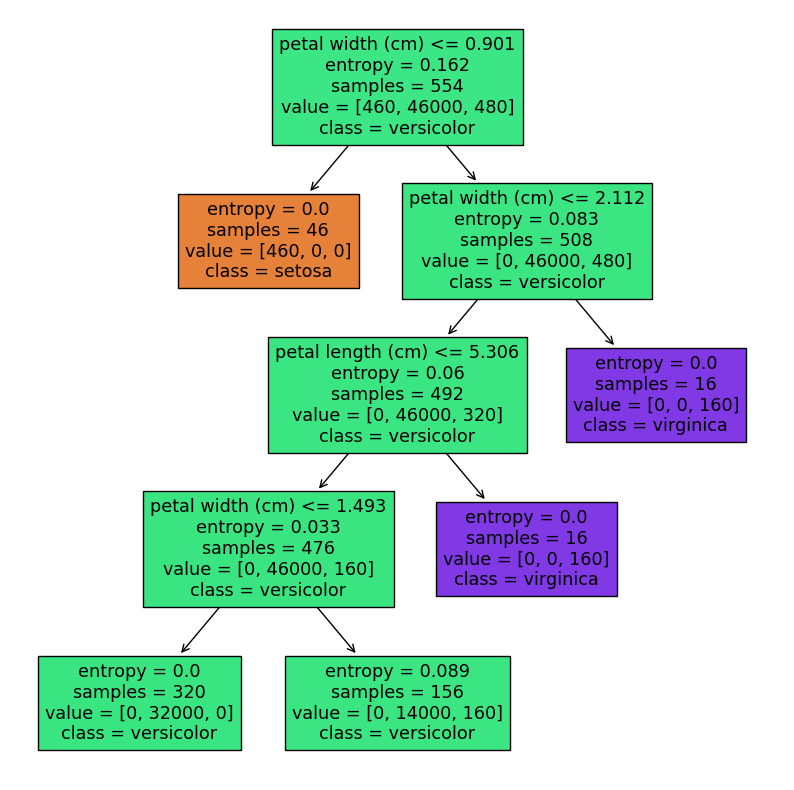

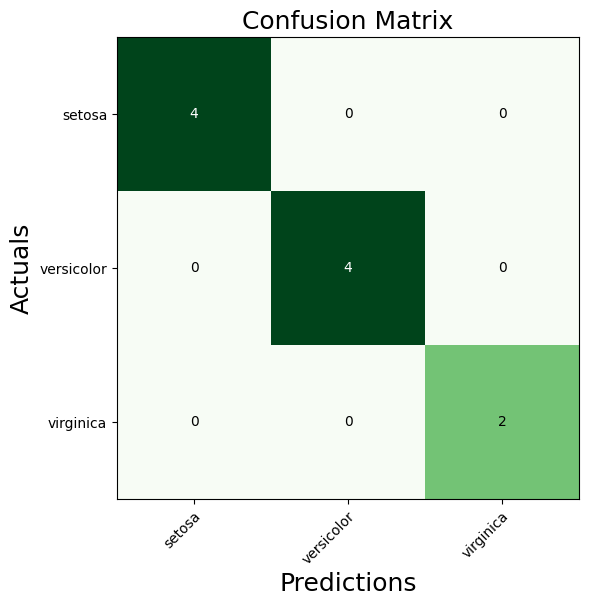

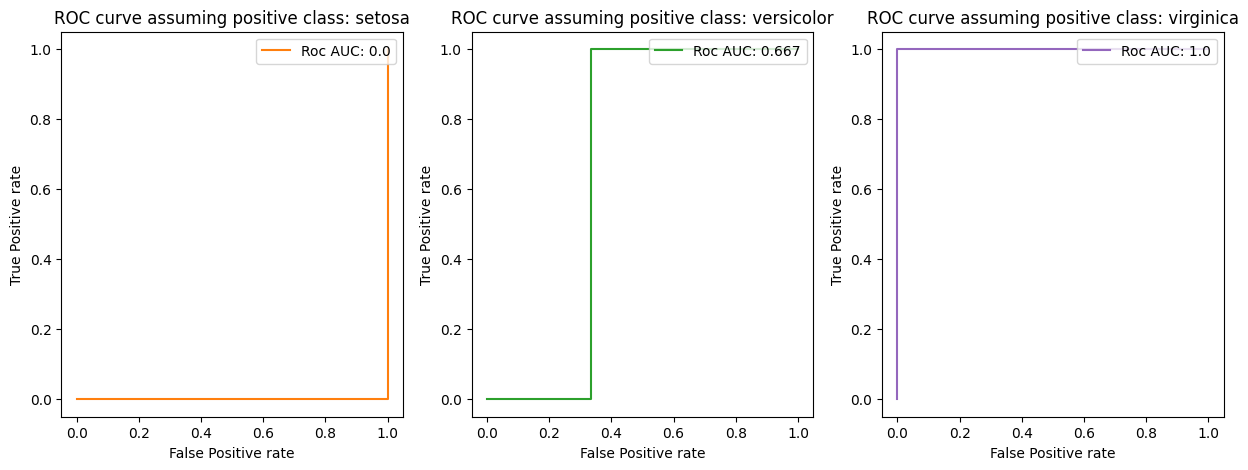

In [208]:
ratio = 10
weight = 10

new_X_train, new_y_train = artificial_inflaction(ratio, 1, X_train, y_train)
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  max_depth=4, 
                                  splitter="random",
                                  min_impurity_decrease = 0.0,
                                  min_samples_split=25, 
                                  min_samples_leaf=1,
                                  random_state=300,
                                  class_weight={0:1,1:weight,2:1})

clf = clf.fit(new_X_train, new_y_train, sample_weight=weight)
predicted_y_test = clf.predict(X_test)

accuracy, precision, recall, f1 = evaluate_model(y_test, predicted_y_test)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

print_decision_tree(clf, 10,10, feature_names=iris.feature_names,class_names=iris.target_names)
print_confusion_matrix(y_test,predicted_y_test, iris.target_names)
display_ROC_curve(y_test, predicted_y_test, iris.target_names)

# Commento Finale

...
...
